In [3]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

import tensorflow as tf


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
df_spectra=pd.read_csv("spectrum_energy_input_numberOfPeaks.csv",index_col=[0])
x_data=np.asarray([df_spectra["no_of_max"].values]).transpose()
x_data_max=max(x_data)
x_data=x_data/x_data_max
#x_data=np.asarray([df_spectra[["no_of_max","Energy_highest_max_normalized"]].to_numpy()])[0]

y_data=np.asarray([df_spectra[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]
df_spectra.head(-50)


In [ ]:
print(y_data.shape)

print(x_data.shape)


print(y_data)

from sklearn.preprocessing import MultiLabelBinarizer
le = MultiLabelBinarizer()
le.fit(y_data)
y_data_enc=le.transform(y_data)


In [ ]:
#always seems to leave some values at zero
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    #model.add(Dense(25, activation='relu'))
    #model.add(Dense(10, activation='relu'))
    print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def get_model2(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(15, input_dim=n_inputs, kernel_initializer='ones', activation='relu'))
   # model.add(Dense(5, activation='sigmoid'))
   # model.add(Dense(10, activation='sigmoid'))

    #model.add(Dense(10, activation='relu'))
    print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=1e-5))
    return model

In [ ]:
def evaluate_model(X, y, epochs):
    results = list()
    n_inputs = X.shape[1]
    print(n_inputs)
    n_outputs = y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        
       # print(X_train[0],y_train[0])
        #print(len(X_train))
        #print(X_train,y_train)
        # define model
        model = get_model2(n_inputs, n_outputs)
        # fit model
        #print(len(X_train))
        model.fit(X_train, y_train, verbose=0, epochs=epochs)
        # make a prediction on the test set
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat
        # calculate accuracy
        
        rse=model.evaluate(X_test,y_test)
        
        #print(y_test,yhat)
        
        
        # store result
        #print( rse)
        results.append(rse)
    
    #y_predict1=[yhat[i][0] for i in range(len(yhat))]
   # y_predict2=[yhat[i][1] for i in range(len(yhat))]
   #y_test1=[y_test[i][0] for i in range(len(y_test))]
   # y_test2=[y_test[i][1] for i in range(len(y_test))]
   # print(y_test)
   # print(yhat)
   
    
    df_test=pd.DataFrame(y_test,columns=["k6a1_test","k6a2_test","k11_test","k12_test","k9a1_test","k9a2_test"])
    df_hat=pd.DataFrame(yhat,columns=["k6a1_hat","k6a2_hat","k11_hat","k12_hat","k9a1_hat","k9a2_hat"])
   # df_test=pd.DataFrame(y_test,columns=["NO_test"])
   # df_hat=pd.DataFrame(yhat,columns=["NO_hat"])

    return results,pd.concat([df_test,df_hat], axis=1)




In [ ]:
results=[]
epochs_list=[]
complete_range=[]
for i in range(50,150,10):
    complete_range.append(i)


print(complete_range)
#for i in complete_range:#
#    epochs_list.append(i)
#    results.append( evaluate_model(x_data,y_data,epochs_list[-1])[0])

results,compare =evaluate_model(x_data,y_data,7500)

In [ ]:
#results_avg=[ sum(res)/len(res) for res in results   ]

print(results)
#plt.plot(epochs_list,results_avg)

print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))
compare.head()

In [4]:
#Validation is now done in the .fit() function
# testing data is now only used for final evaulation

df_spectra_new=pd.read_csv("spectrum_energy_input_numberOfPeaks.csv",index_col=[0])



x_data_max_new=max(df_spectra_new["no_of_max"])

df_training = df_spectra_new.sample(frac=0.8,random_state=10)
df_testing=df_spectra_new.drop(df_training.index)


x_data_train=np.asarray([df_training["no_of_max"].values]).transpose()
x_data_train=x_data_train/x_data_max_new

x_data_test=np.asarray([df_testing["no_of_max"].values]).transpose()
x_data_test=x_data_test/x_data_max_new

y_data_train=np.asarray([df_training[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]
y_data_test=np.asarray([df_testing[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()])[0]

print(y_data_train.shape)
print(x_data_train.shape)

(583, 6)
(583, 1)


In [5]:

def plot_the_loss_curve(epochs, mse,val_mse):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")

    plt.plot(epochs, mse, label="Loss")
    plt.plot(epochs, val_mse, label="Val Loss")

    plt.legend()
    plt.ylim([min(mse)*0.5, 0.5])
    plt.show()  

#print("Defined the plot_the_loss_curve function.")

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(30, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
   

    # model.add(Dense(500, activation='linear'))
   # model.add(Dense(10, activation='linear'))
   # print(n_outputs)
    model.add(Dense(n_outputs, activation='relu'))
    model.compile(loss='MAE', optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics="MAE")
    return model


def train_model(model, x_data,y_data, epochs, 
                batch_size=None):
    """Train the model by feeding it data."""
    
    
    history = model.fit(x=x_data, y=y_data, batch_size=batch_size,
                      epochs=epochs, shuffle=True, verbose=1,validation_split=0.2) 
    
    epochs = history.epoch
  
    hist = pd.DataFrame(history.history)
    #hist.head()
    #mse = hist["mean_squared_error"]
    
    return hist,epochs

In [6]:
epochs = 200
batch_size = 250
my_model=get_model(x_data_train.shape[1],y_data_train.shape[1])

df_hist,epochs = train_model(my_model, x_data_train,y_data_train, epochs, 
                          batch_size)


Epoch 1/200
2/2 [==============================] - 1s 327ms/step - loss: 0.3746 - MAE: 0.3746 - val_loss: 0.3852 - val_MAE: 0.3852
Epoch 2/200
2/2 [==============================] - 0s 65ms/step - loss: 0.3735 - MAE: 0.3735 - val_loss: 0.3843 - val_MAE: 0.3843
Epoch 3/200
2/2 [==============================] - 0s 47ms/step - loss: 0.3724 - MAE: 0.3724 - val_loss: 0.3834 - val_MAE: 0.3834
Epoch 4/200
2/2 [==============================] - 0s 45ms/step - loss: 0.3713 - MAE: 0.3713 - val_loss: 0.3825 - val_MAE: 0.3825
Epoch 5/200
2/2 [==============================] - 0s 58ms/step - loss: 0.3703 - MAE: 0.3703 - val_loss: 0.3817 - val_MAE: 0.3817
Epoch 6/200
2/2 [==============================] - 0s 47ms/step - loss: 0.3692 - MAE: 0.3692 - val_loss: 0.3808 - val_MAE: 0.3808
Epoch 7/200
2/2 [==============================] - 0s 58ms/step - loss: 0.3681 - MAE: 0.3681 - val_loss: 0.3799 - val_MAE: 0.3799
Epoch 8/200
2/2 [==============================] - 0s 56ms/step - loss: 0.3670 - MAE: 0.3

2/2 [==============================] - 0s 42ms/step - loss: 0.3023 - MAE: 0.3023 - val_loss: 0.3239 - val_MAE: 0.3239
Epoch 64/200
2/2 [==============================] - 0s 41ms/step - loss: 0.3017 - MAE: 0.3017 - val_loss: 0.3235 - val_MAE: 0.3235
Epoch 65/200
2/2 [==============================] - 0s 42ms/step - loss: 0.3011 - MAE: 0.3011 - val_loss: 0.3229 - val_MAE: 0.3229
Epoch 66/200
2/2 [==============================] - 0s 42ms/step - loss: 0.3005 - MAE: 0.3005 - val_loss: 0.3224 - val_MAE: 0.3224
Epoch 67/200
2/2 [==============================] - 0s 40ms/step - loss: 0.3000 - MAE: 0.3000 - val_loss: 0.3219 - val_MAE: 0.3219
Epoch 68/200
2/2 [==============================] - 0s 54ms/step - loss: 0.2994 - MAE: 0.2994 - val_loss: 0.3214 - val_MAE: 0.3214
Epoch 69/200
2/2 [==============================] - 0s 55ms/step - loss: 0.2988 - MAE: 0.2988 - val_loss: 0.3210 - val_MAE: 0.3210
Epoch 70/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2983 - MAE: 0.2983 - 

2/2 [==============================] - 0s 38ms/step - loss: 0.2781 - MAE: 0.2781 - val_loss: 0.3018 - val_MAE: 0.3018
Epoch 126/200
2/2 [==============================] - 0s 35ms/step - loss: 0.2779 - MAE: 0.2779 - val_loss: 0.3015 - val_MAE: 0.3015
Epoch 127/200
2/2 [==============================] - 0s 41ms/step - loss: 0.2776 - MAE: 0.2776 - val_loss: 0.3011 - val_MAE: 0.3011
Epoch 128/200
2/2 [==============================] - 0s 52ms/step - loss: 0.2773 - MAE: 0.2773 - val_loss: 0.3008 - val_MAE: 0.3008
Epoch 129/200
2/2 [==============================] - 0s 62ms/step - loss: 0.2770 - MAE: 0.2770 - val_loss: 0.3005 - val_MAE: 0.3005
Epoch 130/200
2/2 [==============================] - 0s 47ms/step - loss: 0.2767 - MAE: 0.2767 - val_loss: 0.3001 - val_MAE: 0.3001
Epoch 131/200
2/2 [==============================] - 0s 32ms/step - loss: 0.2765 - MAE: 0.2765 - val_loss: 0.2998 - val_MAE: 0.2998
Epoch 132/200
2/2 [==============================] - 0s 36ms/step - loss: 0.2762 - MAE: 0.

2/2 [==============================] - 0s 39ms/step - loss: 0.2623 - MAE: 0.2623 - val_loss: 0.2836 - val_MAE: 0.2836
Epoch 188/200
2/2 [==============================] - 0s 47ms/step - loss: 0.2620 - MAE: 0.2620 - val_loss: 0.2833 - val_MAE: 0.2833
Epoch 189/200
2/2 [==============================] - 0s 45ms/step - loss: 0.2618 - MAE: 0.2618 - val_loss: 0.2830 - val_MAE: 0.2830
Epoch 190/200
2/2 [==============================] - 0s 46ms/step - loss: 0.2616 - MAE: 0.2616 - val_loss: 0.2827 - val_MAE: 0.2827
Epoch 191/200
2/2 [==============================] - 0s 45ms/step - loss: 0.2613 - MAE: 0.2613 - val_loss: 0.2824 - val_MAE: 0.2824
Epoch 192/200
2/2 [==============================] - 0s 42ms/step - loss: 0.2611 - MAE: 0.2611 - val_loss: 0.2821 - val_MAE: 0.2821
Epoch 193/200
2/2 [==============================] - 0s 39ms/step - loss: 0.2608 - MAE: 0.2608 - val_loss: 0.2818 - val_MAE: 0.2818
Epoch 194/200
2/2 [==============================] - 0s 38ms/step - loss: 0.2606 - MAE: 0.

Final evaluation: 0.25916269421577454 0.27959731221199036


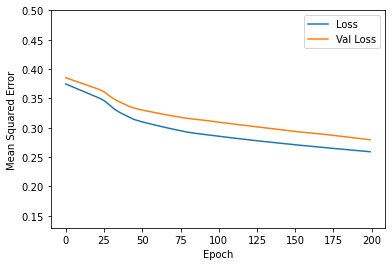

In [8]:

mae = df_hist["MAE"].to_numpy()
val_mae = df_hist["val_MAE"].to_numpy()
print("Final evaluation:", mae[-1], val_mae[-1] )
plot_the_loss_curve(epochs, mae,val_mae)

In [9]:
evaluation=my_model.evaluate(x = x_data_test, y = y_data_test, batch_size=batch_size)
predicted = my_model.predict(x_data_test)
print(evaluation)

df_test=pd.DataFrame(y_data_test,columns=["k6a1_test","k6a2_test","k11_test","k12_test","k9a1_test","k9a2_test"])
df_predict=pd.DataFrame(predicted,columns=["k6a1_hat","k6a2_hat","k11_hat","k12_hat","k9a1_hat","k9a2_hat"])
pd.concat([df_test,df_predict], axis=1).head()

1/1 [==============================] - 0s 2ms/step - loss: 0.2691 - MAE: 0.2691
[0.26905524730682373, 0.26905524730682373]


,k6a1_test,k6a2_test,k11_test,k12_test,k9a1_test,k9a2_test,k6a1_hat,k6a2_hat,k11_hat,k12_hat,k9a1_hat,k9a2_hat
0,0.25,0.25,0.25,0.25,0.50,0.50,0.250018,0.318174,0.250067,0.259532,0.250298,0.259286
1,0.25,0.25,0.25,0.25,0.75,0.75,0.532024,0.691762,0.518968,0.660825,0.686697,0.685303
2,0.25,0.25,0.25,0.50,0.50,0.50,0.250018,0.318174,0.250067,0.259532,0.250298,0.259286
3,0.25,0.25,0.25,0.50,0.75,0.25,0.250018,0.318174,0.250067,0.259532,0.250298,0.259286
4,0.25,0.25,0.50,0.50,0.50,0.50,0.185445,0.231256,0.181928,0.167086,0.150651,0.151495


In [45]:
my_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_46 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 126       
Total params: 806
Trainable params: 806
Non-trainable params: 0
_________________________________________________________________
